In [4]:
import pandas as pd
import numpy as np
import duckdb
from xgboost import XGBRegressor
import warnings
from tqdm.notebook import tqdm

modelling_conn = duckdb.connect('modelling_db')
modelling_conn.execute("SET memory_limit = '16GB'")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# MODELOS

In [1]:
from modelling_utils.preprocessing import get_abt_estacoes_vizinhas
from training_utils import train_model
import duckdb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

modelling_conn = duckdb.connect('modelling_db')
abt_estacoes_vizinhas = get_abt_estacoes_vizinhas(modelling_conn=modelling_conn,abt_estacoes_vizinhas_table_name='abt_estacoes_3_vizinhas')

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

## Modelo 1

In [2]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=1,
    usar_n_estacoes_vizinhas=0,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 1
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 0
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros

📋 Resumo final:
   • Features de treino: (12734467, 39)
   • Features de teste: (5460499, 39)
   • Target treino - valores únicos: 267671
   • Target teste - valores únicos: 121575
🎯 Treinando modelo...
   • Features utilizadas: 37
   • Amostras de treino: 12734467
✅ Treinamento concluído!
🔮 Gerando predições...
⚖️  Truncando 665124 predições negativas para 0
📊 Predições geradas: 5460499
   • Valor mín: 0.000
   • Valor máx: 139.553
   • Média: 3.736
📋 Computando métricas de comparação...
✅ Comparação concluída!
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Model

## Modelo 2

In [3]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=2,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 2
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros

📋 Resumo final:
   • Features de treino: (12734467, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 267671
   • Target teste - valores únicos: 121575
🎯 Treinando modelo...
   • Features utilizadas: 42
   • Amostras de treino: 12734467
✅ Treinamento concluído!
🔮 Gerando predições...
⚖️  Truncando 735819 predições negativas para 0
📊 Predições geradas: 5460499
   • Valor mín: 0.000
   • Valor máx: 155.405
   • Média: 3.730
📋 Computando métricas de comparação...
✅ Comparação concluída!
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Modelo: models/model_2.pkl
   • Comparação: comparisons/comparison_2.pkl

🎉 Processo concluído com sucesso para modelo 2!


## Modelo 3

In [4]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=3,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=False,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 3
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Modelo único

=== TREINAMENTO MODELO ÚNICO ===
📈 Preparando dados de treino e teste...
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros
⚖️  Aplicando undersampling com ratio 1...
📉 Tamanho reduzido de 12734467 para 8206094 registros

📋 Resumo final:
   • Features de treino: (8206094, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 175175
   • Target teste - valores únicos: 121575

📊 Estatísticas do target após processamento:
   • Treino - Média: 5.775, Mediana: 0.100
   • Teste  - Média: 3.716, Mediana: 0.000
   • Zeros no treino: 4,101,399 (50.0%)
   • Zeros no teste: 3,702,686 (67.8%)
🎯 Treinando modelo...
   • Features utilizadas: 42
   • Amostras de treino: 8206094
✅ Treinamento concluído!
🔮 Gerando predições...
⚖️  Truncando 705974 predições negativas para 0
📊 Predições geradas: 5460499
   • Valor mín: 0.000
   • Valor máx: 168.771
   • Média: 4.225
📋 Computando métricas de comparação...
✅ Comparação concluída!
💾 Salvando modelo e comparação...


## Modelo 4

In [5]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=4,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 4
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Bi-model

=== TREINAMENTO BI-MODEL (threshold=0.5) ===
🔀 Separando dados por prioridade de estações vizinhas...
   • Com vizinha: 11959652 registros
   • Sem vizinha: 18194966 registros
📈 Preparando dados de treino e teste para cada modelo...


Preparando dados:   0%|          | 0/2 [00:00<?, ?it/s]

📊 Iniciando processamento com 11959652 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 8370264 registros | Teste: 3589388 registros
⚖️  Aplicando undersampling com ratio 1...
📉 Tamanho reduzido de 8370264 para 5670662 registros

📋 Resumo final:
   • Features de treino: (5670662, 44)
   • Features de teste: (3589388, 44)
   • Target treino - valores únicos: 170428
   • Target teste - valores únicos: 117636

📊 Estatísticas do target após processamento:
   • Treino - Média: 5.575, Mediana: 0.100
   • Teste  - Média: 3.685, Mediana: 0.000
   • Zeros no treino: 2,833,355 (50.0%)
   • Zeros no teste: 2,393,756 (66.7%)
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros
⚖️  Aplicando undersampling com ratio 1...
📉 Tamanho reduzido de 12734467 para 8206094 registros

📋 Resumo final:
   • Features de treino: (8206094, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 175175
   • Target teste - valores únicos: 121575

📊 Estatísticas do target após processamento:
   • Treino - Média: 5.775, Mediana: 0.100
   • Teste  - Média: 3.716, Mediana: 0.000
   • Zeros no treino: 4,101,399 (50.0%)
   • Zeros no teste: 3,702,686 (67.8%)
🎯 Treinando modelos...


Treinando modelos:   0%|          | 0/2 [00:00<?, ?it/s]

   • com_vizinha: 42 features, 5670662 amostras
   • sem_vizinha: 42 features, 8206094 amostras
✅ Treinamento de ambos os modelos concluído!
🔮 Gerando predições e métricas...


Gerando predições:   0%|          | 0/2 [00:00<?, ?it/s]

⚖️  com_vizinha: Truncando 594303 predições negativas para 0
   • com_vizinha: 3589388 predições (média: 3.991)
⚖️  sem_vizinha: Truncando 705974 predições negativas para 0
   • sem_vizinha: 5460499 predições (média: 4.225)
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Modelo: models/model_4.pkl
   • Comparação: comparisons/comparison_4.pkl

🎉 Processo concluído com sucesso para modelo 4!


## Modelo 5

In [9]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=5,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

🚀 Iniciando treinamento do modelo 5
📊 Dados de entrada: (18194966, 90)
🏗️  Modelo: XGBRegressor
🌐 Estações vizinhas: 1
🔄 Tipo de modelo: Bi-model

=== TREINAMENTO BI-MODEL (threshold=0.5) ===
🔀 Separando dados por prioridade de estações vizinhas...
   • Com vizinha: 11959652 registros
   • Sem vizinha: 18194966 registros
📈 Preparando dados de treino e teste para cada modelo...


Preparando dados:   0%|          | 0/2 [00:00<?, ?it/s]

📊 Iniciando processamento com 11959652 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 8370264 registros | Teste: 3589388 registros

📋 Resumo final:
   • Features de treino: (8370264, 44)
   • Features de teste: (3589388, 44)
   • Target treino - valores únicos: 261676
   • Target teste - valores únicos: 117636
📊 Iniciando processamento com 18194966 registros...
🏭 Dataset base criado com 40 colunas
🌐 Incluindo dados de 1 estação(ões) vizinha(s)...


Adicionando estações vizinhas:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Dataset expandido para 45 colunas
🔄 Realizando partição temporal (70.0% treino)...
📈 Treino: 12734467 registros | Teste: 5460499 registros

📋 Resumo final:
   • Features de treino: (12734467, 44)
   • Features de teste: (5460499, 44)
   • Target treino - valores únicos: 267671
   • Target teste - valores únicos: 121575
🎯 Treinando modelos...


Treinando modelos:   0%|          | 0/2 [00:00<?, ?it/s]

   • com_vizinha: 42 features, 8370264 amostras
   • sem_vizinha: 42 features, 12734467 amostras
✅ Treinamento de ambos os modelos concluído!
🔮 Gerando predições e métricas...


Gerando predições:   0%|          | 0/2 [00:00<?, ?it/s]

⚖️  com_vizinha: Truncando 606706 predições negativas para 0
   • com_vizinha: 3589388 predições (média: 3.653)
⚖️  sem_vizinha: Truncando 735819 predições negativas para 0
   • sem_vizinha: 5460499 predições (média: 3.730)
💾 Salvando modelo e comparação...
✅ Arquivos salvos:
   • Modelo: models/model_5.pkl
   • Comparação: comparisons/comparison_5.pkl

🎉 Processo concluído com sucesso para modelo 5!


## Modelo 6

In [13]:
from modelling_utils.model_management import save_model_and_comparison
from modelling_utils.sampling import undersample_zeros,smoteR
from modelling_utils.preprocessing import split_com_sem_vizinha,particao_por_estacao
from comparison_utils import compute_comparison_df
from tqdm.notebook import tqdm
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os

def generate_X_y_train_test(abt_estacoes_vizinhas, usar_n_estacoes_vizinhas=0, 
                           zero_undersampling_ratio=None, smote_oversampling=False, 
                           smote_threshold=0.5, smote_pct_oversampling=100, 
                           smote_pct_undersampling=100, smote_k_neighbors=5,
                           smote_constraint_columns=None, smote_relevance_function=None,
                           percent_datetime_partitioning_split=0.7,
                           random_state=None):
    """
    Gera conjuntos de treino e teste a partir de dados de estações meteorológicas.
    
    Esta função processa um DataFrame com dados de estações meteorológicas e suas
    estações vizinhas, criando conjuntos de treino e teste para modelagem preditiva
    de precipitação. Oferece opções para incluir dados de estações vizinhas,
    balanceamento de dados e particionamento temporal.
    
    Parameters
    ----------
    abt_estacoes_vizinhas : pd.DataFrame
        DataFrame contendo os dados das estações meteorológicas e suas vizinhas.
        Deve conter a coluna 'vl_precipitacao' como variável target.
        
    usar_n_estacoes_vizinhas : int, optional, default=0
        Número de estações vizinhas a incluir no dataset. Se 0, não inclui
        dados de estações vizinhas. Deve ser >= 0.
        
    zero_undersampling_ratio : float, optional, default=None
        Proporção de registros com precipitação zero em relação aos registros
        com precipitação > 0 no conjunto de treino. Se None, não aplica undersampling.
        Exemplos:
        - 1.0: mantém mesmo número de zeros e não-zeros (balanceamento 50/50)
        - 0.5: mantém metade de zeros em relação aos não-zeros
        - 2.0: mantém o dobro de zeros em relação aos não-zeros
        Deve ser > 0.
        
    smote_oversampling : bool, optional, default=False
        Se True, aplica técnica SMOTE-R para oversampling de casos raros.
        
    smote_threshold : float, optional, default=0.5
        Limiar para determinar observações raras vs comuns no SMOTE-R.
        
    smote_pct_oversampling : int, optional, default=100
        Porcentagem de oversampling para casos raros no SMOTE-R.
        
    smote_pct_undersampling : int, optional, default=100
        Porcentagem de undersampling para casos comuns no SMOTE-R.
        
    smote_k_neighbors : int, optional, default=5
        Número de vizinhos mais próximos para geração sintética no SMOTE-R.
        
    smote_constraint_columns : list or str, optional, default=None
        Lista de colunas que devem ter valores iguais entre a amostra e seus vizinhos
        no SMOTE-R. Exemplo: ['dt_medicao'] ou ['dt_medicao', 'regiao'].
        
    smote_relevance_function : callable, optional, default=None
        Função customizada que determina a relevância de uma observação no SMOTE-R.
        Se None, usa função padrão baseada na distância da mediana.
        
    percent_datetime_partitioning_split : float, optional, default=0.7
        Percentual dos dados para treino na partição temporal.
        Deve estar entre 0 e 1.
        
    random_state : int, optional, default=None
        Semente para reprodutibilidade em operações aleatórias.
    
    Returns
    -------
    tuple
        Tupla contendo (X_train, X_test, y_train, y_test):
        - X_train : pd.DataFrame - Features de treino
        - X_test : pd.DataFrame - Features de teste  
        - y_train : pd.Series - Target de treino
        - y_test : pd.Series - Target de teste
    
    Raises
    ------
    ValueError
        Se os parâmetros estiverem fora dos limites válidos ou se colunas
        obrigatórias estiverem ausentes.
        
    KeyError
        Se colunas esperadas não existirem no DataFrame de entrada.
        
    TypeError
        Se os tipos dos parâmetros não forem os esperados.
    
    Examples
    --------
    >>> # Uso básico sem estações vizinhas
    >>> X_train, X_test, y_train, y_test = generate_X_y_train_test(df_estacoes)
    
    >>> # Balanceamento 50/50 (mesmo número de zeros e não-zeros)
    >>> X_train, X_test, y_train, y_test = generate_X_y_train_test(
    ...     df_estacoes, 
    ...     zero_undersampling_ratio=1.0,
    ...     random_state=42
    ... )
    
    >>> # Incluindo 3 estações vizinhas com menos zeros que não-zeros
    >>> X_train, X_test, y_train, y_test = generate_X_y_train_test(
    ...     df_estacoes, 
    ...     usar_n_estacoes_vizinhas=3,
    ...     zero_undersampling_ratio=0.5,  # metade de zeros em relação aos não-zeros
    ...     smote_oversampling=True,
    ...     smote_threshold=0.6,
    ...     smote_constraint_columns=['dt_medicao'],
    ...     random_state=42
    ... )
    
    >>> # Mantendo mais zeros que não-zeros
    >>> X_train, X_test, y_train, y_test = generate_X_y_train_test(
    ...     df_estacoes, 
    ...     zero_undersampling_ratio=2.0,  # dobro de zeros em relação aos não-zeros
    ...     random_state=42
    ... )
    
    Notes
    -----
    - A função assume que existe uma função `particao_por_estacao` disponível
    - A função assume que existe uma função `undersample_zeros` disponível
    - A função assume que existe uma função `smoteR` disponível quando smote_oversampling=True
    - O undersampling é aplicado apenas no conjunto de treino, não afetando o conjunto de teste
    """
    
    
    try:
        if not isinstance(usar_n_estacoes_vizinhas, int) or usar_n_estacoes_vizinhas < 0:
            raise ValueError("usar_n_estacoes_vizinhas deve ser um inteiro >= 0")
        
        if zero_undersampling_ratio is not None:
            if not isinstance(zero_undersampling_ratio, (int, float)) or zero_undersampling_ratio <= 0:
                raise ValueError("zero_undersampling_ratio deve ser None ou um número > 0")
        
        if not isinstance(percent_datetime_partitioning_split, (int, float)) or not (0 < percent_datetime_partitioning_split < 1):
            raise ValueError("percent_datetime_partitioning_split deve ser um número entre 0 e 1")
        
        if not isinstance(smote_threshold, (int, float)) or not (0 <= smote_threshold <= 1):
            raise ValueError("smote_threshold deve ser um número entre 0 e 1")
        
        if not isinstance(smote_pct_oversampling, int) or smote_pct_oversampling < 0:
            raise ValueError("smote_pct_oversampling deve ser um inteiro >= 0")
        
        if not isinstance(smote_pct_undersampling, int) or smote_pct_undersampling < 0:
            raise ValueError("smote_pct_undersampling deve ser um inteiro >= 0")
        
        if not isinstance(smote_k_neighbors, int) or smote_k_neighbors < 1:
            raise ValueError("smote_k_neighbors deve ser um inteiro >= 1")
        
        if abt_estacoes_vizinhas.empty:
            raise ValueError("DataFrame de entrada não pode estar vazio")
        
        if 'vl_precipitacao' not in abt_estacoes_vizinhas.columns:
            raise KeyError("Coluna 'vl_precipitacao' não encontrada no DataFrame")
        
        print(f"📊 Iniciando processamento com {len(abt_estacoes_vizinhas)} registros...")
        
        abt = abt_estacoes_vizinhas[[c for c in abt_estacoes_vizinhas.columns if 'vizinha' not in c]].copy()
        print(f"🏭 Dataset base criado com {abt.shape[1]} colunas")
        
        if usar_n_estacoes_vizinhas > 0:
            print(f"🌐 Incluindo dados de {usar_n_estacoes_vizinhas} estação(ões) vizinha(s)...")
            
            vizinhas_columns_prefix = [
                'vl_correlacao_estacao_vizinha_{i_vizinha}',
                'pct_intersecao_precipitacao_vizinha_{i_vizinha}',
                'vl_distancia_km_vizinha_{i_vizinha}',
                'vl_prioridade_vizinha_{i_vizinha}',
                'vl_precipitacao_vizinha_{i_vizinha}'
            ]
            
            for i in tqdm(range(1, usar_n_estacoes_vizinhas + 1), desc="Adicionando estações vizinhas"):
                vizinha_columns = [col.format(i_vizinha=i) for col in vizinhas_columns_prefix]
                
                missing_cols = [col for col in vizinha_columns if col not in abt_estacoes_vizinhas.columns]
                if missing_cols:
                    print(f"⚠️  Aviso: Colunas não encontradas para estação vizinha {i}: {missing_cols}")
                    continue
                
                for col in vizinha_columns:
                    try:
                        abt.loc[:, col] = abt_estacoes_vizinhas[col]
                    except KeyError as e:
                        print(f"⚠️  Erro ao adicionar coluna {col}: {e}")
            
            print(f"✅ Dataset expandido para {abt.shape[1]} colunas")

        print(f"🔄 Realizando partição temporal ({percent_datetime_partitioning_split:.1%} treino)...")
        try:
            training_abt, validation_abt = particao_por_estacao(abt, percent_datetime_partitioning_split)
            print(f"📈 Treino: {len(training_abt)} registros | Teste: {len(validation_abt)} registros")
        except Exception as e:
            raise RuntimeError(f"Erro na partição dos dados: {e}")
        
        try:
            X_train, y_train = training_abt.drop('vl_precipitacao', axis=1), training_abt['vl_precipitacao']
            X_test, y_test = validation_abt.drop('vl_precipitacao', axis=1), validation_abt['vl_precipitacao']
        except KeyError as e:
            raise KeyError(f"Erro ao separar features e target: {e}")

        if zero_undersampling_ratio is not None:
            print(f"⚖️  Aplicando undersampling com ratio {zero_undersampling_ratio}...")
            print(f"    💡 Isso significa: {zero_undersampling_ratio} zeros para cada 1 não-zero")
            try:
                original_size = len(X_train)
                zeros_before = (y_train == 0).sum()
                non_zeros_before = (y_train > 0).sum()
                
                X_train, y_train = undersample_zeros(X_train, y_train, zero_ratio=zero_undersampling_ratio, random_state=random_state)
                
                zeros_after = (y_train == 0).sum()
                non_zeros_after = (y_train > 0).sum()
                actual_ratio = zeros_after / non_zeros_after if non_zeros_after > 0 else 0
                
                print(f"📉 Antes: {zeros_before:,} zeros, {non_zeros_before:,} não-zeros")
                print(f"📊 Depois: {zeros_after:,} zeros, {non_zeros_after:,} não-zeros")
                print(f"📈 Ratio real: {actual_ratio:.2f} | Tamanho: {original_size} → {len(X_train)}")
                
            except Exception as e:
                raise RuntimeError(f"Erro no undersampling: {e}")

        if smote_oversampling:
            print(f"🧬 Aplicando SMOTE-R com threshold={smote_threshold}...")
            try:
                training_combined = pd.concat([X_train, y_train], axis=1)
                
                balanced_training = smoteR(
                    dataframe=training_combined,
                    target_column='vl_precipitacao',
                    explanatory_variables=list(X_train.columns),
                    relevance_function=smote_relevance_function,
                    threshold=smote_threshold,
                    pct_oversampling=smote_pct_oversampling,
                    pct_undersampling=smote_pct_undersampling,
                    number_of_nearest_neighbors=smote_k_neighbors,
                    constraint_columns=smote_constraint_columns,
                    random_state=random_state
                )
                
                X_train = balanced_training.drop('vl_precipitacao', axis=1)
                y_train = balanced_training['vl_precipitacao']
                
                print(f"✅ SMOTE-R aplicado com sucesso!")
                
            except Exception as e:
                print(f"❌ Erro na aplicação do SMOTE-R: {e}")
                print("   Continuando com dataset não balanceado...")
        
        print(f"\n📋 Resumo final:")
        print(f"   • Features de treino: {X_train.shape}")
        print(f"   • Features de teste: {X_test.shape}")
        print(f"   • Target treino - valores únicos: {y_train.nunique()}")
        print(f"   • Target teste - valores únicos: {y_test.nunique()}")
        
        if smote_oversampling or zero_undersampling_ratio is not None:
            print(f"\n📊 Estatísticas do target após processamento:")
            print(f"   • Treino - Média: {y_train.mean():.3f}, Mediana: {y_train.median():.3f}")
            print(f"   • Teste  - Média: {y_test.mean():.3f}, Mediana: {y_test.median():.3f}")
            print(f"   • Zeros no treino: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.1f}%)")
            print(f"   • Zeros no teste: {(y_test == 0).sum():,} ({(y_test == 0).mean()*100:.1f}%)")
        
        return X_train, X_test, y_train, y_test
        
    except (ValueError, KeyError, TypeError) as e:
        print(f"❌ Erro de validação: {e}")
        raise
    except Exception as e:
        print(f"❌ Erro inesperado: {e}")
        raise RuntimeError(f"Erro inesperado durante o processamento: {e}")
    

def train_model(abt_estacoes_vizinhas, Model, model_number, usar_n_estacoes_vizinhas,
                zero_undersampling_ratio=None, smote_oversampling=False, 
                smote_threshold=0.5, smote_pct_oversampling=100,
                smote_pct_undersampling=100, smote_k_neighbors=5,
                smote_constraint_columns=None, smote_random_state=None,
                use_bi_model=False, threshold_prioridade=0.5, 
                percent_datetime_partitioning_split=0.7,
                truncate_to_non_negative_target=True):
    """
    Treina modelo(s) de machine learning para previsão de precipitação.
    
    Esta função treina modelos preditivos usando dados de estações meteorológicas,
    oferecendo duas abordagens: modelo único ou modelo duplo (bi-model). O modelo
    duplo separa os dados baseado na prioridade das estações vizinhas e treina
    modelos específicos para cada grupo.
    
    Parameters
    ----------
    abt_estacoes_vizinhas : pd.DataFrame
        DataFrame contendo os dados das estações meteorológicas e suas vizinhas.
        Deve conter as colunas 'id_estacao', 'dt_medicao' e 'vl_precipitacao'.
        
    Model : class
        Classe do modelo de machine learning a ser utilizado (ex: RandomForestRegressor).
        Deve implementar os métodos fit() e predict().
        
    model_number : int or str
        Identificador único do modelo para salvamento dos arquivos.
        
    usar_n_estacoes_vizinhas : int
        Número de estações vizinhas a incluir no dataset. Deve ser >= 0.
        
    zero_undersampling_ratio : float, optional, default=None
        Proporção de registros com precipitação zero em relação aos registros
        com precipitação > 0 no conjunto de treino. Se None, não aplica undersampling.
        Exemplos:
        - 1.0: mantém mesmo número de zeros e não-zeros (balanceamento 50/50)
        - 0.5: mantém metade de zeros em relação aos não-zeros
        - 2.0: mantém o dobro de zeros em relação aos não-zeros
        Deve ser > 0.
        
    smote_oversampling : bool, optional, default=False
        Se True, aplica técnica SMOTE-R para balanceamento de target contínuo.
        
    smote_threshold : float, optional, default=0.5
        Limiar para determinar observações raras vs comuns no SMOTE-R.
        
    smote_pct_oversampling : int, optional, default=100
        Porcentagem de oversampling para casos raros no SMOTE-R.
        
    smote_pct_undersampling : int, optional, default=100
        Porcentagem de undersampling para casos comuns no SMOTE-R.
        
    smote_k_neighbors : int, optional, default=5
        Número de vizinhos mais próximos para geração sintética no SMOTE-R.
        
    smote_constraint_columns : list or str, optional
        Colunas que devem ter valores iguais entre amostras e vizinhos no SMOTE-R.
        Exemplo: ['dt_medicao'] para manter consistência temporal.
        
    smote_random_state : int, optional
        Semente para reprodutibilidade do SMOTE-R.
        
    use_bi_model : bool, optional, default=False
        Se True, treina dois modelos separados baseado no threshold_prioridade.
        Se False, treina um modelo único.
        
    threshold_prioridade : float, optional, default=0.5
        Threshold para separar dados em 'com_vizinha' e 'sem_vizinha' quando
        use_bi_model=True. Deve estar entre 0 e 1.
        
    percent_datetime_partitioning_split : float, optional, default=0.7
        Percentual dos dados para treino na partição temporal.
        Deve estar entre 0 e 1.
        
    truncate_to_non_negative_target : bool, optional, default=True
        Se True, trunca predições negativas para 0 (precipitação não pode ser negativa).
    
    Returns
    -------
    tuple
        Tupla contendo (model, comparison):
        
        Para modelo único (use_bi_model=False):
        - model : objeto do modelo treinado
        - comparison : pd.DataFrame com comparação entre valores reais e preditos
        
        Para bi-model (use_bi_model=True):
        - model : dict com chaves 'com_vizinha' e 'sem_vizinha' contendo os modelos
        - comparison : dict com chaves 'com_vizinha' e 'sem_vizinha' contendo as comparações
    
    Raises
    ------
    ValueError
        Se os parâmetros estiverem fora dos limites válidos ou se colunas
        obrigatórias estiverem ausentes.
        
    TypeError
        Se o Model não implementar os métodos necessários ou se os tipos
        dos parâmetros não forem os esperados.
        
    RuntimeError
        Se ocorrer erro durante o treinamento ou salvamento dos modelos.
        
    FileNotFoundError
        Se os diretórios 'models' ou 'comparisons' não existirem.
    
    Examples
    --------
    >>> from sklearn.ensemble import RandomForestRegressor
    >>> 
    >>> # Modelo único com 2 estações vizinhas
    >>> model, comparison = train_model(
    ...     df_estacoes, 
    ...     RandomForestRegressor, 
    ...     model_number=1,
    ...     usar_n_estacoes_vizinhas=2
    ... )
    
    >>> # Balanceamento 50/50 (mesmo número de zeros e não-zeros)
    >>> model, comparison = train_model(
    ...     df_estacoes, 
    ...     RandomForestRegressor, 
    ...     model_number=2,
    ...     usar_n_estacoes_vizinhas=2,
    ...     zero_undersampling_ratio=1.0
    ... )
    
    >>> # Bi-model com SMOTE-R e menos zeros que não-zeros
    >>> model, comparison = train_model(
    ...     df_estacoes,
    ...     RandomForestRegressor,
    ...     model_number=3,
    ...     usar_n_estacoes_vizinhas=3,
    ...     use_bi_model=True,
    ...     smote_oversampling=True,
    ...     smote_constraint_columns=['dt_medicao'],
    ...     zero_undersampling_ratio=0.5,  # metade de zeros em relação aos não-zeros
    ...     threshold_prioridade=0.6
    ... )
    
    Notes
    -----
    - A função salva automaticamente o modelo e comparação nos diretórios 'models' e 'comparisons'
    - Requer as funções auxiliares: generate_X_y_train_test, split_com_sem_vizinha, 
      compute_comparison_df, save_model_and_comparison
    - Para bi-model, os dados são separados baseado na prioridade das estações vizinhas
    - Predições negativas são truncadas para 0 por padrão (precipitação física)
    - O undersampling é aplicado apenas no conjunto de treino, não afetando o conjunto de teste
    """
    
    try:
        # Validação de parâmetros
        if not hasattr(Model, '__call__'):
            raise TypeError("Model deve ser uma classe instanciável")
        
        if not isinstance(usar_n_estacoes_vizinhas, int) or usar_n_estacoes_vizinhas < 0:
            raise ValueError("usar_n_estacoes_vizinhas deve ser um inteiro >= 0")
        
        if zero_undersampling_ratio is not None:
            if not isinstance(zero_undersampling_ratio, (int, float)) or zero_undersampling_ratio <= 0:
                raise ValueError("zero_undersampling_ratio deve ser None ou um número > 0")
        
        if not isinstance(threshold_prioridade, (int, float)) or not (0 <= threshold_prioridade <= 1):
            raise ValueError("threshold_prioridade deve ser um número entre 0 e 1")
        
        if not isinstance(percent_datetime_partitioning_split, (int, float)) or not (0 < percent_datetime_partitioning_split < 1):
            raise ValueError("percent_datetime_partitioning_split deve ser um número entre 0 e 1")
        
        # Verificar DataFrame de entrada
        if abt_estacoes_vizinhas.empty:
            raise ValueError("DataFrame de entrada não pode estar vazio")
        
        required_columns = ['id_estacao', 'dt_medicao', 'vl_precipitacao']
        missing_cols = [col for col in required_columns if col not in abt_estacoes_vizinhas.columns]
        if missing_cols:
            raise KeyError(f"Colunas obrigatórias não encontradas: {missing_cols}")
        
        # Verificar se diretórios existem
        os.makedirs('models', exist_ok=True)
        os.makedirs('comparisons', exist_ok=True)
        
        print(f"🚀 Iniciando treinamento do modelo {model_number}")
        print(f"📊 Dados de entrada: {abt_estacoes_vizinhas.shape}")
        print(f"🏗️  Modelo: {Model.__name__}")
        print(f"🌐 Estações vizinhas: {usar_n_estacoes_vizinhas}")
        print(f"🔄 Tipo de modelo: {'Bi-model' if use_bi_model else 'Modelo único'}")
        if zero_undersampling_ratio is not None:
            print(f"⚖️  Zero undersampling ratio: {zero_undersampling_ratio} (zeros por não-zero)")
        
        if not use_bi_model:
            print("\n=== TREINAMENTO MODELO ÚNICO ===")
            
            # Gerar dados de treino e teste
            print("📈 Preparando dados de treino e teste...")
            try:
                X_train, X_test, y_train, y_test = generate_X_y_train_test(
                    abt_estacoes_vizinhas,
                    usar_n_estacoes_vizinhas=usar_n_estacoes_vizinhas,
                    zero_undersampling_ratio=zero_undersampling_ratio,
                    smote_oversampling=smote_oversampling,
                    smote_threshold=smote_threshold,
                    smote_pct_oversampling=smote_pct_oversampling,
                    smote_pct_undersampling=smote_pct_undersampling,
                    smote_k_neighbors=smote_k_neighbors,
                    smote_constraint_columns=smote_constraint_columns,
                    smote_relevance_function=None,
                    percent_datetime_partitioning_split=percent_datetime_partitioning_split,
                    random_state=smote_random_state
                )
            except Exception as e:
                raise RuntimeError(f"Erro na preparação dos dados: {e}")
            
            # Verificar se as colunas necessárias estão presentes para remoção
            train_cols_to_drop = [col for col in ['id_estacao', 'dt_medicao'] if col in X_train.columns]
            test_cols_to_drop = [col for col in ['id_estacao', 'dt_medicao'] if col in X_test.columns]
            
            if len(train_cols_to_drop) != len(test_cols_to_drop):
                print("⚠️  Aviso: Colunas de identificação diferentes entre treino e teste")
            
            # Treinar modelo
            print("🎯 Treinando modelo...")
            try:
                model = Model()
                X_train_features = X_train.drop(train_cols_to_drop, axis=1)
                print(f"   • Features utilizadas: {X_train_features.shape[1]}")
                print(f"   • Amostras de treino: {len(y_train)}")
                
                model.fit(X_train_features, y_train)
                print("✅ Treinamento concluído!")
            except Exception as e:
                raise RuntimeError(f"Erro durante o treinamento: {e}")
            
            # Fazer predições
            print("🔮 Gerando predições...")
            try:
                X_test_features = X_test.drop(test_cols_to_drop, axis=1)
                y_pred = model.predict(X_test_features)
                
                if truncate_to_non_negative_target:
                    negative_count = np.sum(y_pred < 0)
                    if negative_count > 0:
                        print(f"⚖️  Truncando {negative_count} predições negativas para 0")
                    y_pred = np.clip(y_pred, a_min=0, a_max=None)
                
                print(f"📊 Predições geradas: {len(y_pred)}")
                print(f"   • Valor mín: {np.min(y_pred):.3f}")
                print(f"   • Valor máx: {np.max(y_pred):.3f}")
                print(f"   • Média: {np.mean(y_pred):.3f}")
            except Exception as e:
                raise RuntimeError(f"Erro na geração de predições: {e}")
            
            # Computar comparação
            print("📋 Computando métricas de comparação...")
            try:
                comparison = compute_comparison_df(X_test, y_test, y_pred)
                print("✅ Comparação concluída!")
            except Exception as e:
                raise RuntimeError(f"Erro no cálculo de métricas: {e}")
        
        elif use_bi_model:
            print(f"\n=== TREINAMENTO BI-MODEL (threshold={threshold_prioridade}) ===")
            
            # Inicializar estruturas de dados
            abt, X_train, X_test, y_train, y_test, model, y_pred, comparison = {}, {}, {}, {}, {}, {}, {}, {}
            
            # Separar dados com e sem vizinha
            print("🔀 Separando dados por prioridade de estações vizinhas...")
            try:
                abt['com_vizinha'], abt['sem_vizinha'] = split_com_sem_vizinha(
                    abt_estacoes_vizinhas, threshold_prioridade
                )
                print(f"   • Com vizinha: {len(abt['com_vizinha'])} registros")
                print(f"   • Sem vizinha: {len(abt['sem_vizinha'])} registros")
            except Exception as e:
                raise RuntimeError(f"Erro na separação dos dados: {e}")
            
            # Preparar dados para cada tipo
            print("📈 Preparando dados de treino e teste para cada modelo...")
            for tipo in tqdm(['com_vizinha', 'sem_vizinha'], desc="Preparando dados"):
                try:
                    if len(abt[tipo]) == 0:
                        print(f"⚠️  Aviso: Dataset '{tipo}' está vazio!")
                        continue
                        
                    X_train[tipo], X_test[tipo], y_train[tipo], y_test[tipo] = generate_X_y_train_test(
                        abt[tipo],
                        usar_n_estacoes_vizinhas=usar_n_estacoes_vizinhas,
                        zero_undersampling_ratio=zero_undersampling_ratio,
                        smote_oversampling=smote_oversampling,
                        smote_threshold=smote_threshold,
                        smote_pct_oversampling=smote_pct_oversampling,
                        smote_pct_undersampling=smote_pct_undersampling,
                        smote_k_neighbors=smote_k_neighbors,
                        smote_constraint_columns=smote_constraint_columns,
                        smote_relevance_function=None,
                        percent_datetime_partitioning_split=percent_datetime_partitioning_split,
                        random_state=smote_random_state
                    )
                except Exception as e:
                    raise RuntimeError(f"Erro na preparação dos dados para '{tipo}': {e}")
            
            # Treinar modelos
            print("🎯 Treinando modelos...")
            model['com_vizinha'], model['sem_vizinha'] = Model(), Model()
            
            for tipo in tqdm(['com_vizinha', 'sem_vizinha'], desc="Treinando modelos"):
                if tipo not in X_train or len(X_train[tipo]) == 0:
                    print(f"⚠️  Pulando treinamento para '{tipo}' - dados insuficientes")
                    continue
                    
                try:
                    cols_to_drop = [col for col in ['id_estacao', 'dt_medicao'] if col in X_train[tipo].columns]
                    X_train_features = X_train[tipo].drop(cols_to_drop, axis=1)
                    
                    print(f"   • {tipo}: {X_train_features.shape[1]} features, {len(y_train[tipo])} amostras")
                    model[tipo].fit(X_train_features, y_train[tipo])
                except Exception as e:
                    raise RuntimeError(f"Erro no treinamento do modelo '{tipo}': {e}")
            
            print("✅ Treinamento de ambos os modelos concluído!")
            
            # Fazer predições e calcular comparações
            print("🔮 Gerando predições e métricas...")
            for tipo in tqdm(['com_vizinha', 'sem_vizinha'], desc="Gerando predições"):
                if tipo not in X_test or len(X_test[tipo]) == 0:
                    print(f"⚠️  Pulando predições para '{tipo}' - dados insuficientes")
                    continue
                    
                try:
                    cols_to_drop = [col for col in ['id_estacao', 'dt_medicao'] if col in X_test[tipo].columns]
                    X_test_features = X_test[tipo].drop(cols_to_drop, axis=1)
                    
                    y_pred[tipo] = model[tipo].predict(X_test_features)
                    
                    if truncate_to_non_negative_target:
                        negative_count = np.sum(y_pred[tipo] < 0)
                        if negative_count > 0:
                            print(f"⚖️  {tipo}: Truncando {negative_count} predições negativas para 0")
                        y_pred[tipo] = np.clip(y_pred[tipo], a_min=0, a_max=None)
                    
                    comparison[tipo] = compute_comparison_df(X_test[tipo], y_test[tipo], y_pred[tipo])
                    
                    print(f"   • {tipo}: {len(y_pred[tipo])} predições (média: {np.mean(y_pred[tipo]):.3f})")
                except Exception as e:
                    raise RuntimeError(f"Erro nas predições para '{tipo}': {e}")
        
        # Salvar modelo e comparação
        print(f"💾 Salvando modelo e comparação...")
        try:
            model_path = f'models/model_{model_number}.pkl'
            comparison_path = f'comparisons/comparison_{model_number}.pkl'
            
            save_model_and_comparison(model, comparison, model_path, comparison_path)
            
            print(f"✅ Arquivos salvos:")
            print(f"   • Modelo: {model_path}")
            print(f"   • Comparação: {comparison_path}")
        except Exception as e:
            raise RuntimeError(f"Erro no salvamento: {e}")
        
        print(f"\n🎉 Processo concluído com sucesso para modelo {model_number}!")
        
        return model, comparison
    
    except (ValueError, KeyError, TypeError) as e:
        print(f"❌ Erro de validação: {e}")
        raise
    except RuntimeError as e:
        print(f"❌ Erro durante execução: {e}")
        raise
    except Exception as e:
        print(f"❌ Erro inesperado: {e}")
        raise RuntimeError(f"Erro inesperado durante o treinamento: {e}")

In [12]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=6,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=2,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

❌ Erro de validação: zero_undersampling_ratio deve ser None ou um número entre 0 e 1


ValueError: zero_undersampling_ratio deve ser None ou um número entre 0 e 1

## Modelo 7

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=7,
    usar_n_estacoes_vizinhas=1,
    zero_undersampling_ratio=5,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 8

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=8,
    usar_n_estacoes_vizinhas=2,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 9

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=9,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 10

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=10,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=None,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.5,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 11

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=11,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.25,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 12

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=12,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 13

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=13,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.85,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 14

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=14,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=1,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.95,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 15

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=15,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=2,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

## Modelo 16

In [ ]:
model,comparison = train_model(
    abt_estacoes_vizinhas,
    Model=XGBRegressor,
    model_number=16,
    usar_n_estacoes_vizinhas=3,
    zero_undersampling_ratio=3,
    smote_oversampling=False,
    use_bi_model=True,
    threshold_prioridade=0.75,
    percent_datetime_partitioning_split=0.7,
    truncate_to_non_negative_target=True)

# COMPARAÇÕES

In [6]:
from comparison_utils import plot_model_metrics,import_model_and_comparison,compute_metrics,plot_metrica_heatmap,plot_metric_by_bin
import pandas as pd

# Parâmetros de métricas
relative_error_threshold = 0.2
absolute_error_threshold = 10
min_sem_chuva = 1
min_relevancia = 0.5
beta = 1
minimo_muita_chuva = 20

## Métricas Gerais

In [7]:
model_numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# model_numbers = [8,9,10,11,12,13,14,15,16]
models,comparisons,metrics = {},{},{}
for model_number in model_numbers:
    model_path,comparison_path = f'models/model_{model_number}.pkl',f'comparisons/comparison_{model_number}.pkl'
    models[model_number],comparisons[model_number] = import_model_and_comparison(model_path,comparison_path)
    if type(models[model_number]) == dict:
        comparisons[model_number] = pd.concat(comparisons[model_number].values())

    comparisons[model_number]['model'] = f'model_{model_number}'
    metrics[model_number] = compute_metrics(comparisons[model_number]['y_test'],comparisons[model_number]['y_pred'])
metrics_df = pd.DataFrame.from_dict(metrics,orient='index').reset_index(names=['model_number'])

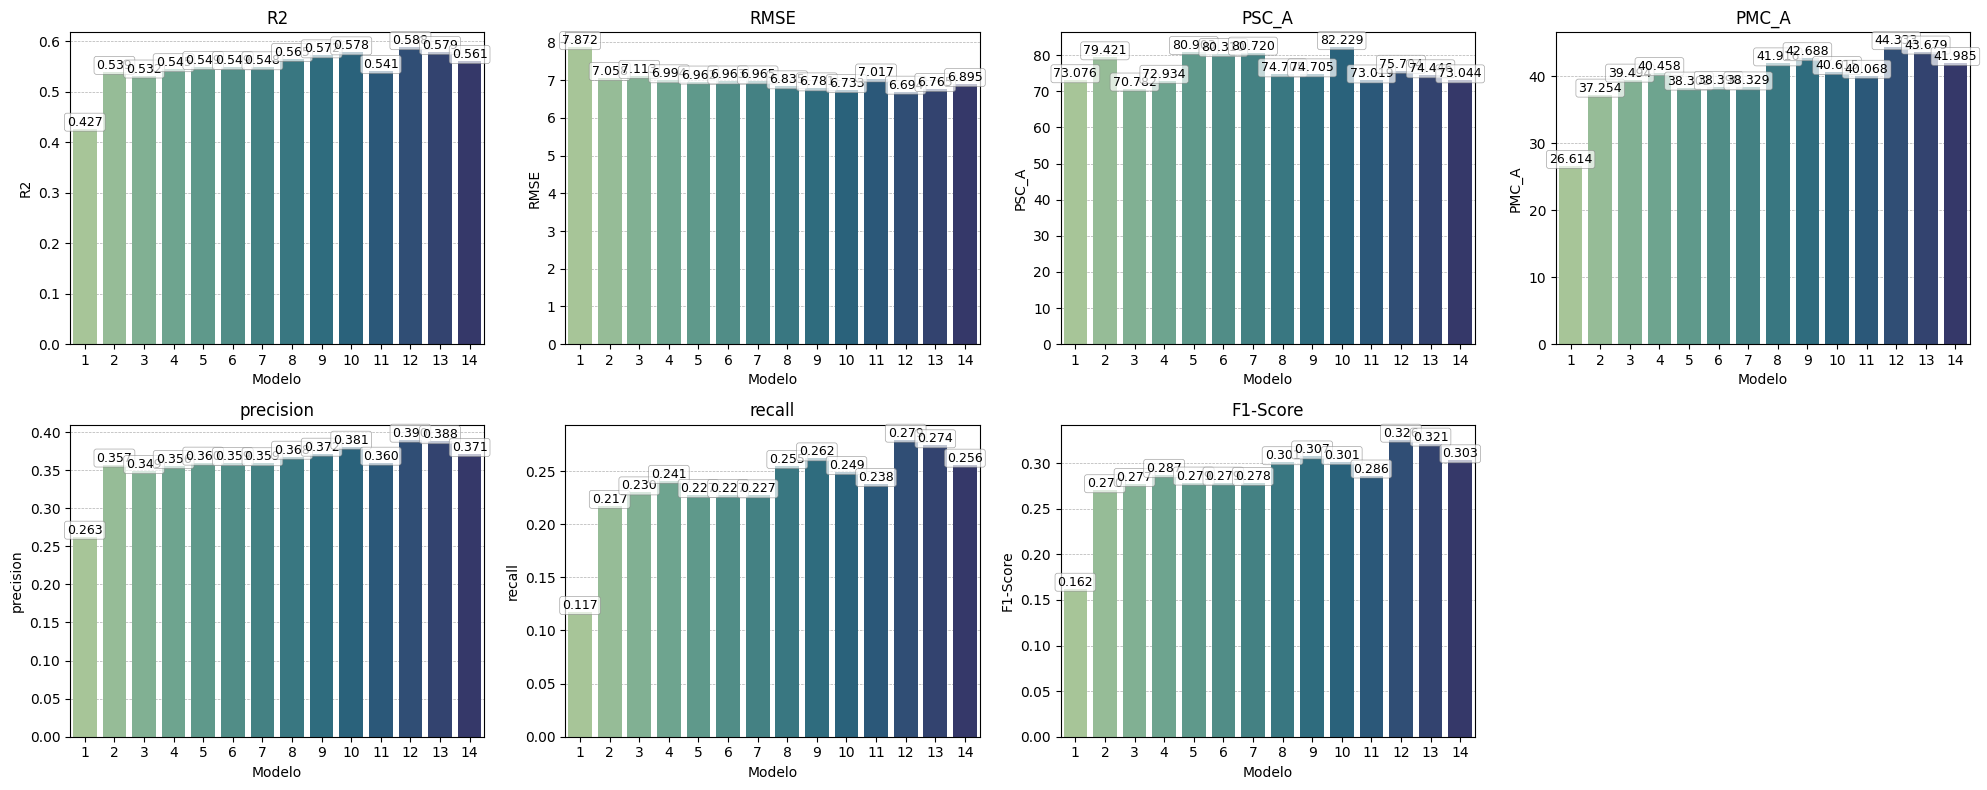

In [8]:
plot_model_metrics(metrics_df, ['R2', 'RMSE','PSC_A','PMC_A','precision','recall','F1-Score'])

## Análise por estações

In [7]:
estacoes = comparisons[1]['id_estacao'].unique()
dim_lat_lon = comparisons[1][['id_estacao','latitude','longitude']].drop_duplicates()

comparisons_estacoes = {
    model_number:{
        id_estacao:comparisons[model_number].loc[comparisons[model_number]['id_estacao']==id_estacao].copy() 
        for id_estacao in estacoes} 
    for model_number in comparisons.keys()}

metrics_estacoes = {
    model_number:{
        id_estacao:compute_metrics(comparisons_estacoes[model_number][id_estacao]['y_test'],comparisons_estacoes[model_number][id_estacao]['y_pred']) 
        for id_estacao in estacoes} 
    for model_number in comparisons.keys()}

dados = []
for model_number, estacoes_dict in metrics_estacoes.items():
    for id_estacao, metricas in estacoes_dict.items():
        linha = {"model_number": model_number, "id_estacao": id_estacao}
        linha.update(metricas)
        dados.append(linha)

df_metricas = pd.DataFrame(dados)
df_metricas = df_metricas.merge(dim_lat_lon,on='id_estacao',how='left')


C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Pa

c:\Users\Mateus Santos Rochas\Desktop\Estudos\07. Doutorado - Matemática aplicada\Pesquisa\Dados Novos\comparison_utils.py:121: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil_estados = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


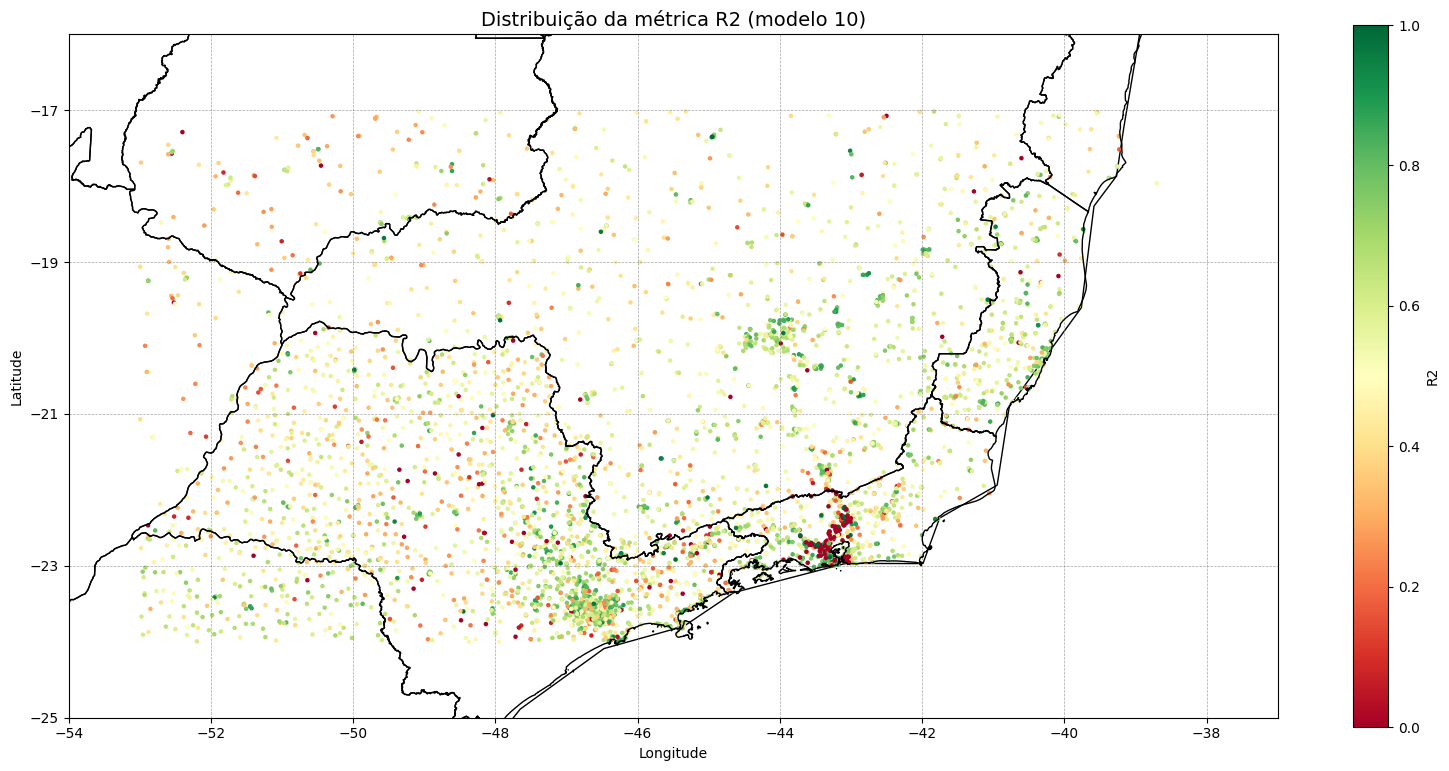

In [8]:
plot_metrica_heatmap(df_metricas, 'R2',model_number=10,figsize=(16,12),markersize=5)

# ANALISES INDIVIDUAIS

In [9]:
from comparison_utils import get_all_comparisons,get_metrics_per_station,plot_model_prediction_vs_observation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
model_numbers = [1,2,3,4,5,6,7,8,9,10]
comparison_df = get_all_comparisons(model_numbers)
count_medicoes_df = comparison_df.groupby(['model','id_estacao'],as_index=False).agg(count_medicoes=('y_test','count'))

metrics_per_station_df = get_metrics_per_station(comparison_df)
metrics_per_station_df = metrics_per_station_df.merge(count_medicoes_df,left_on=['model_number','id_estacao'],right_on=['model','id_estacao'],how='left')

C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Mateus Santos Rochas\AppData\Local\Pa

In [11]:
model_number = 10
min_count_medicoes = 100
metric = 'R2'
ascending = False

metrics_per_station_df.loc[
    (metrics_per_station_df['model_number']==f'model_{model_number}')
    & (metrics_per_station_df['count_medicoes']>=min_count_medicoes)].sort_values(by=metric,ascending=ascending).head()

,model_number,id_estacao,precision,recall,F1-Score,RMSE,R2,MAE,PSC_A,PCC_A,PMC_A,latitude,longitude,model,count_medicoes
6370,model_10,920341,0.965171,0.967894,0.966530,1.044169,0.986951,0.419367,96.829971,99.472991,97.500000,-17.3500,-44.9500,model_10,3188
7119,model_10,925311,0.976553,0.936604,0.956161,1.631661,0.983262,0.664382,96.571429,98.888889,95.744681,-22.6500,-44.5833,model_10,530
6480,model_10,921795,0.982738,0.977561,0.980142,1.444058,0.980676,0.721560,92.009029,99.646955,98.837209,-19.7667,-47.9333,model_10,3348
4443,model_10,30,0.959847,0.977215,0.968453,1.591676,0.978199,0.703511,96.003996,99.805825,99.242424,-21.1700,-47.8000,model_10,1516
4469,model_10,65,0.943106,0.944624,0.943865,1.736223,0.975590,0.757007,96.032553,99.437148,97.810219,-21.1700,-47.8000,model_10,1516


In [12]:
model_number = 10
id_estacao = 925311
plot_model_prediction_vs_observation(comparison_df, model_number=model_number, id_estacao=id_estacao,figsize=(18, 6))

TypeError: plot_model_prediction_vs_observation() got an unexpected keyword argument 'figsize'

In [ ]:
comparisons[10].loc[comparisons[10]['id_estacao']==id_estacao].head()

,id_estacao,latitude,longitude,dt_medicao,y_test,y_pred,model
2848687,925311,-22.65,-44.5833,2002-04-11,0.0,0.0,model_10
2848688,925311,-22.65,-44.5833,2002-04-12,0.0,0.0,model_10
2848689,925311,-22.65,-44.5833,2002-04-13,0.0,0.0,model_10
2848690,925311,-22.65,-44.5833,2002-04-14,0.0,0.0,model_10
2848691,925311,-22.65,-44.5833,2002-04-15,0.0,0.0,model_10


In [ ]:
len(estacoes)

4420

In [ ]:
# Conferir se to validando no lugar correto
# >  Ex: estação 920341 ta com dados desde 2000, nao deveria
# > Testar mais limiares pro bi_model
# > Investigar estçaões do ES
# > Implementar o SmoteR
# > Correlação entre o indice da melhor estação e o R2